# Upload the kaggle.json, get the dataset from Kaggle

In [ ]:
# Hardcode the kaggle.json credentials directly into the script

# Replace 'your-username' and 'your-key' with your actual Kaggle username and key
kaggle_credentials = {
    "username": "your_username",
    "key": "your_key"
}

# Create the kaggle.json file in the ~/.kaggle directory
import os
import json

# Ensure the .kaggle directory exists
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Write the kaggle.json file with the credentials
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump(kaggle_credentials, f)

# Set permissions to secure the file
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

In [ ]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset
!unzip crop-recommendation-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 51.9MB/s]
Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


# Data analysis

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
crop = pd.read_csv('Crop_recommendation.csv')

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# Summary for all Crops.
print("   Average Ratio of Nitrogen in the Soil : {0:.2f}".format(crop.N.mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(crop.P.mean()))
print("  Average Ratio of Potassium in the Soil : {0:.2f}".format(crop.K.mean()))
print("          Average Temperature in Celsius : {0:.2f}".format(crop.temperature.mean()))
print("               Average Relative Humidity : {0:.2f}".format(crop['humidity'].mean()))
print("            Average PH Value of the Soil : {0:.2f}".format(crop['ph'].mean()))
print("                  Average Rainfall in mm : {0:.2f}".format(crop['rainfall'].mean()))

   Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
  Average Ratio of Potassium in the Soil : 48.15
          Average Temperature in Celsius : 25.62
               Average Relative Humidity : 71.48
            Average PH Value of the Soil : 6.47
                  Average Rainfall in mm : 103.46


In [ ]:
corr=crop.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Example: Let's assume 'crop' is your DataFrame, and 'label' is the target
# Extract the features and the target variable
X = crop[['N', 'P', 'K', 'temperature', 'humidity', 'rainfall', 'ph']]  # Features
y = crop['label']  # Target variable

# Compute mutual information (this is closely related to information gain)
info_gain = mutual_info_classif(X, y, discrete_features=False)

# Create a DataFrame to display the results
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})

# Sort the features by Information Gain
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Display the Information Gain for each feature
print(info_gain_df)

       Feature  Information Gain
4     humidity          1.729954
5     rainfall          1.637358
2            K          1.626539
1            P          1.314494
3  temperature          1.017901
0            N          0.982053
6           ph          0.686067


<Axes: >

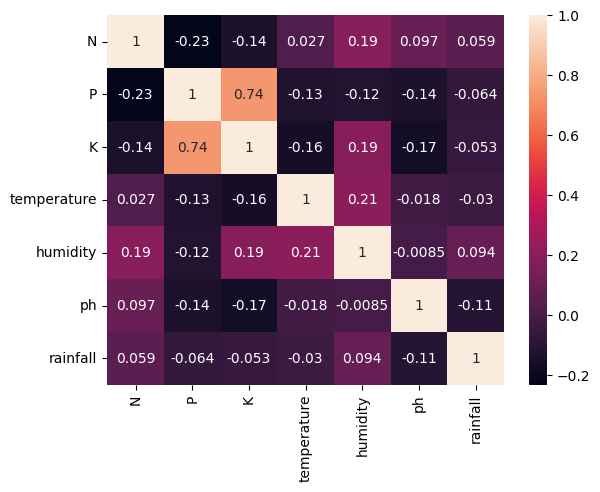

In [ ]:
import seaborn as sns
sns.heatmap(corr, annot=True, cbar= True)

In [ ]:
# prompt: print out the abs() biggest elements from the corr matrix,

abs_corr = corr.abs()
s = abs_corr.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[so != 1][:6])


P            K              0.736232
K            P              0.736232
P            N              0.231460
N            P              0.231460
humidity     temperature    0.205320
temperature  humidity       0.205320
dtype: float64


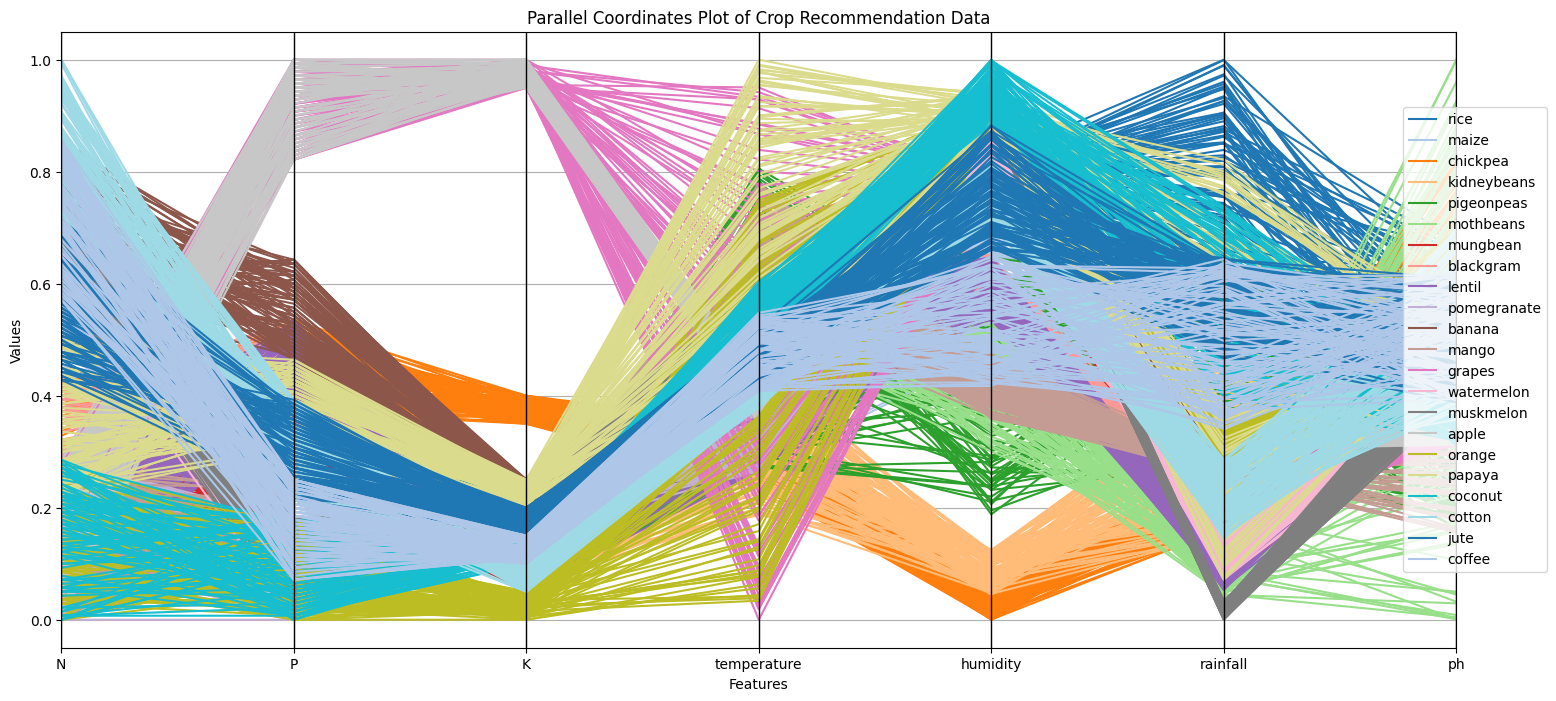

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# prompt: make a paralel chart this lineup: K, P, N, hummidity, temperature

import pandas as pd
import matplotlib.pyplot as plt

# Select the columns for the parallel chart
parallel_df = crop[['N', 'P', 'K', 'temperature', 'humidity', 'rainfall', 'ph']]
scaler = MinMaxScaler()
parallel_df = pd.DataFrame(scaler.fit_transform(parallel_df), columns=parallel_df.columns)
# Add the 'label' column to the DataFrame
parallel_df['label'] = crop['label']
# Create the parallel coordinates plot
plt.figure(figsize=(18,8))
pd.plotting.parallel_coordinates(parallel_df, 'label', color=plt.cm.get_cmap('tab20').colors)
#plt.gca().legend_.remove()
plt.gca().legend(loc='center right', bbox_to_anchor=(1.07, 0.5))
plt.title('Parallel Coordinates Plot of Crop Recommendation Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


In [ ]:
# prompt: make the above plot interactive where i can toogle beetween the different crop labels and only shows 1 crop label by once

import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, SelectMultiple

# Assuming 'parallel_df' is already created as in your original code

def plot_parallel_coordinates(selected_crops):
    plt.figure(figsize=(18, 8))

    # Filter the DataFrame to include only the selected crops
    filtered_df = parallel_df[parallel_df['label'].isin(selected_crops)]

    if not filtered_df.empty:
        pd.plotting.parallel_coordinates(filtered_df, 'label', color=plt.cm.get_cmap('tab20').colors)
        plt.gca().legend(loc='center right', bbox_to_anchor=(1.07, 0.5))
        plt.title('Parallel Coordinates Plot of Selected Crops')
        plt.xlabel('Features')
        plt.ylabel('Values')
    else:
        plt.text(0.5, 0.5, "No data for selected crops", ha='center', va='center', fontsize=14)

    plt.show()


# Create a list of unique crop labels
unique_crops = parallel_df['label'].unique().tolist()

# Use interact to create the interactive plot
interact(plot_parallel_coordinates, selected_crops=SelectMultiple(options=unique_crops, value=[unique_crops[0]]));

interactive(children=(SelectMultiple(description='selected_crops', index=(0,), options=('rice', 'maize', 'chic…

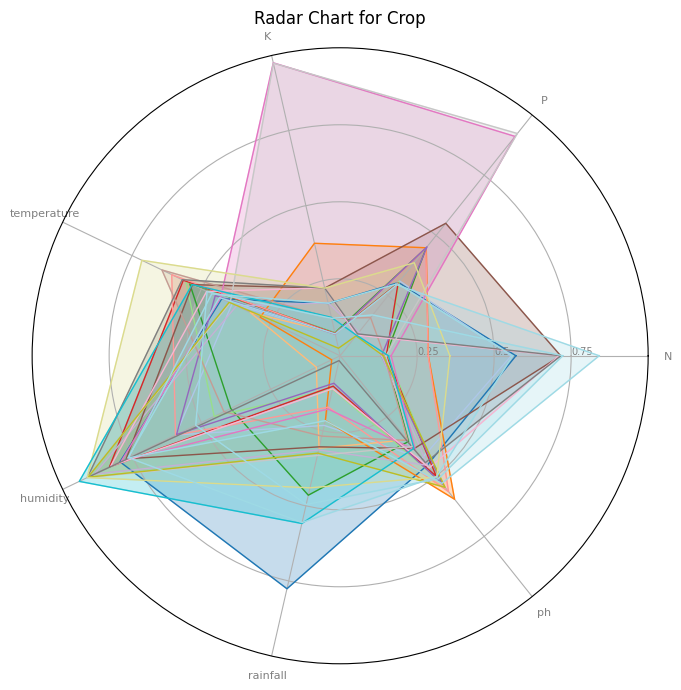

In [ ]:
# prompt: make a radar chart similar to the above paralell chart

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'parallel_df' is already defined and scaled as in the previous code

categories = list(parallel_df.columns)[:-1]  # Exclude the 'label' column
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Create a plot for each crop label
labels = parallel_df['label'].unique()
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in range(len(labels))]
plt.figure(figsize=(8, 8))

i=0
for label in labels:
    crop_data = parallel_df[parallel_df['label'] == label].iloc[:, :-1].mean()  # Average values for the label
    values = list(crop_data)
    values += values[:1]

    ax = plt.subplot(1, 1, 1, polar=True)

    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color='grey', size=7)
    plt.ylim(0, 1)

    ax.plot(angles, values, linewidth=1, linestyle='solid', color=colors[i])
    ax.fill(angles, values, 'b', alpha=0.25, color=colors[i])
    plt.title(f"Radar Chart for Crop")
    i=i+1
plt.show()



In [ ]:
# prompt: make the above radar char plot interactive where i can toogle beetween the different crop labels

# Assuming 'parallel_df' is already defined and scaled as in the previous code

categories = list(parallel_df.columns)[:-1]  # Exclude the 'label' column
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Create a plot for each crop label
labels = parallel_df['label'].unique()
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in range(len(labels))]


def plot_radar_chart(selected_crops):
    plt.figure(figsize=(8, 8))
    values = []
    filtered_df = parallel_df[parallel_df['label'].isin(selected_crops)]
    labels = filtered_df['label'].unique()

    if not filtered_df.empty:
      i=0
      for label in labels:
          crop_data = filtered_df[filtered_df['label'] == label].iloc[:, :-1].mean()  # Average values for the label
          values = list(crop_data)
          values += values[:1]

          ax = plt.subplot(1, 1, 1, polar=True)

          plt.xticks(angles[:-1], categories, color='grey', size=8)
          ax.set_rlabel_position(0)
          plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color='grey', size=7)
          plt.ylim(0, 1)

          ax.plot(angles, values, linewidth=1, linestyle='solid', color=colors[i])
          ax.fill(angles, values, 'b', alpha=0.25, color=colors[i])
          plt.title(f"Radar Chart for Crop {labels}")
          i=i+1
          plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 1))
      plt.show()
    else:
        print('Please select at least one')



interact(plot_radar_chart, selected_crops=SelectMultiple(options=labels, description='Crop Label:'))

interactive(children=(SelectMultiple(description='Crop Label:', options=('rice', 'maize', 'chickpea', 'kidneyb…

<function __main__.plot_radar_chart(selected_crops)>

<Figure size 800x800 with 0 Axes>

In [ ]:
crop['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
# prompt:  make a 3d cordinate system which I can move with the mouse from the P, K, N columns and show the data, give different color for the different labels and put the labels outside from the coordinate system

import plotly.express as px

# Use Alphabet color sequence that has 26 distinct colors (enough for 22 categories)
color_sequence = px.colors.qualitative.Alphabet

plt.figure(figsize=(18, 10))
fig = px.scatter_3d(crop, x='N', y='P', z='K', color='label',
                    hover_data=['label'],
                    color_discrete_sequence=color_sequence,  # Ensures distinct colors
                    title='Crop Recommendation based on NPK values')

fig.update_traces(marker_size = 2.5)

fig.update_layout(
    autosize=False,
    width=1400,
    height=800,
)
fig.update_layout(
    scene = dict(
        xaxis_title='Nitrogen (N)',
        yaxis_title='Phosphorus (P)',
        zaxis_title='Potassium (K)'
    ),
    legend=dict(
        orientation="v",
        xanchor="right"
    )
)


fig.show()


<Figure size 1800x1000 with 0 Axes>

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

# Use Alphabet color sequence that has 26 distinct colors (enough for 22 categories)
color_sequence = px.colors.qualitative.Alphabet

# Plot 3D scatter
fig = px.scatter_3d(crop,
                    x='humidity',
                    y='K',
                    z='rainfall',
                    color='label',
                    color_discrete_sequence=color_sequence,  # Ensures distinct colors
                    hover_data=['label'],
                    title='Crop Recommendation based on humidity, K, rainfall values')

# Adjust marker size
fig.update_traces(marker_size=2.5)

# Set figure size
fig.update_layout(
    autosize=False,
    width=1400,
    height=800,
)

# Update axis titles
fig.update_layout(
    scene=dict(
        xaxis_title='Humidity',
        yaxis_title='Potassium (K)',
        zaxis_title='Rainfall'
    ),
    legend=dict(
        orientation="v",
        xanchor="right"
    )
)

# Show plot
fig.show()


<Figure size 1800x1000 with 0 Axes>

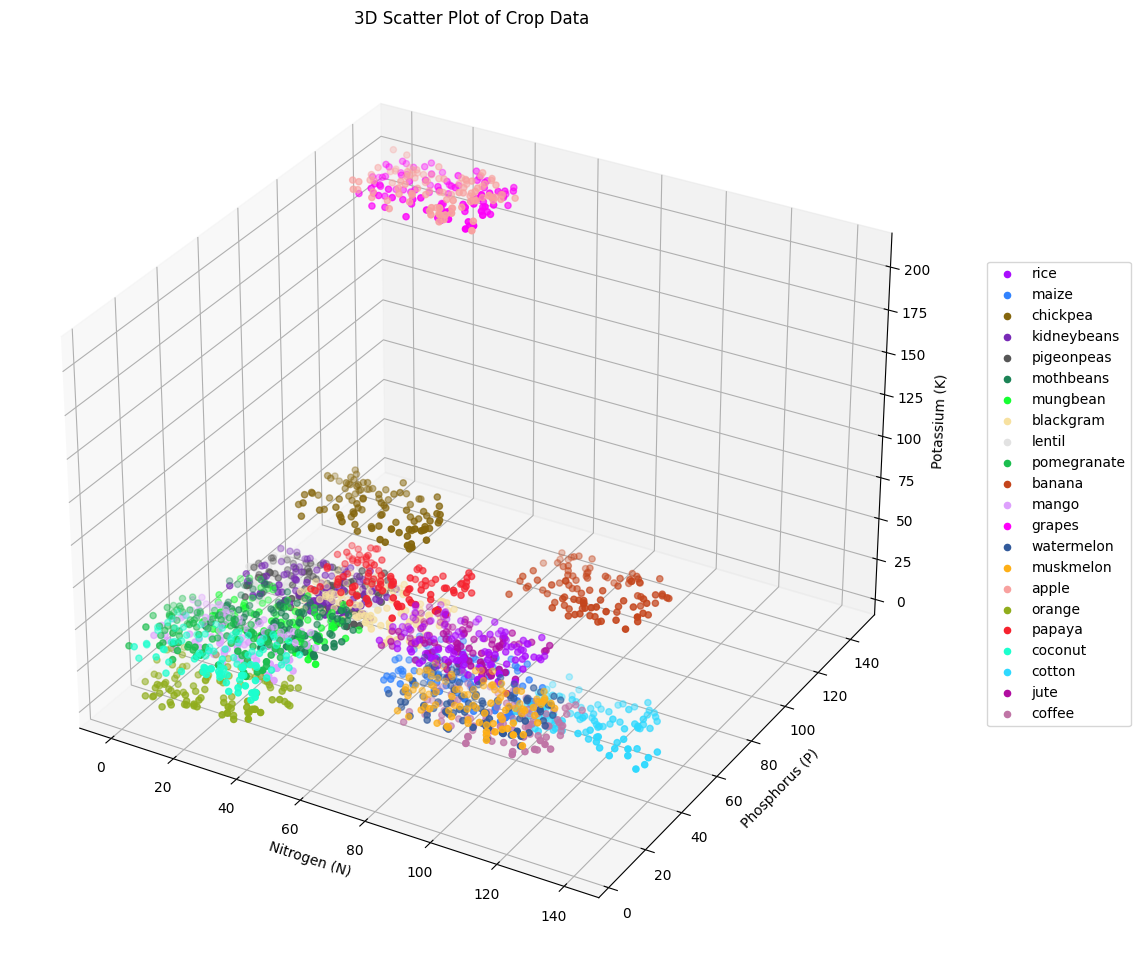

In [ ]:
# prompt: make a 3d cordinate system from the P, K, N columns and show the data, give different color for the different labels and put the labels outside from the coordinate system

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'label' is the column containing crop labels in your DataFrame
labels = crop['label'].unique()

# Color map for different labels
colors = px.colors.qualitative.Alphabet

for i, label in enumerate(labels):
  crop_subset = crop[crop['label'] == label]
  ax.scatter(crop_subset['N'], crop_subset['P'], crop_subset['K'], label=label, color=colors[i])

ax.set_xlabel('Nitrogen (N)')
ax.set_ylabel('Phosphorus (P)')
ax.set_zlabel('Potassium (K)')
ax.set_title('3D Scatter Plot of Crop Data')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.show()


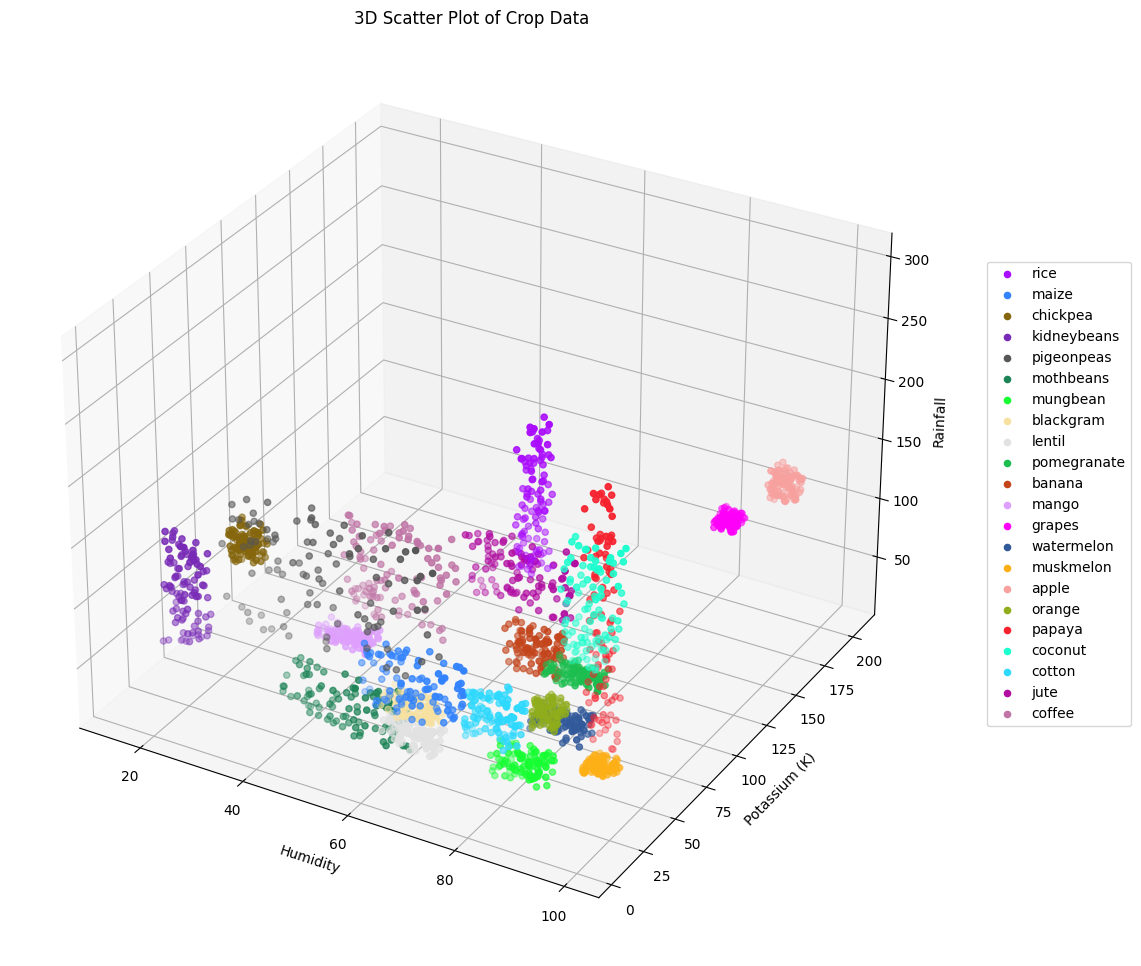

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'label' is the column containing crop labels in your DataFrame
labels = crop['label'].unique()

# Color map for different labels
colors = px.colors.qualitative.Alphabet

for i, label in enumerate(labels):
  crop_subset = crop[crop['label'] == label]
  ax.scatter(crop_subset['humidity'], crop_subset['K'], crop_subset['rainfall'], label=label, color=colors[i])

ax.set_xlabel('Humidity')
ax.set_ylabel('Potassium (K)')
ax.set_zlabel('Rainfall')
ax.set_title('3D Scatter Plot of Crop Data')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.show()

In [ ]:
# Summary Statistics for each of the Crops
from ipywidgets import interact

@interact
def summary(crops = list(crop['label'].value_counts().index)):
    x = crop[crop['label'] == crops]

    print("-"*30)
    print("STatistics for Nitrogen")
    print("Minimum Nitrogen required : ", x['N'].min())
    print("Average Nitrogen required : ", x['N'].mean())
    print("Maximum Nitrogen required : ", x['N'].max())

    print("-"*30)
    print("STatistics for Phosphorous")
    print("Minimum Phosphorous required : ", x['P'].min())
    print("Average Phosphorous required : ", x['P'].mean())
    print("Maximum Phosphorous required : ", x['P'].max())

    print("-"*30)
    print("Statistics for Potassium")
    print("Minimum Potassium required : ", x['K'].min())
    print("Average Potassium required : ", x['K'].mean())
    print("Maximum Potassium required : ", x['K'].max())

    print("-"*30)
    print("Statistics for Temperature")
    print("Minimum Temperature required : ", x['temperature'].min())
    print("Average Temperature required : ", x['temperature'].mean())
    print("Maximum Temperature required : ", x['temperature'].max())

    print("-"*30)
    print("Statistics for Humidity")
    print("Minimum Humidity required : ", x['humidity'].min())
    print("Average Humidity required : ", x['humidity'].mean())
    print("Maximum Humidity required : ", x['humidity'].max())

    print("-"*30)
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : ", x['rainfall'].min())
    print("Average Rainfall required : ", x['rainfall'].mean())
    print("Maximum Rainfall required : ", x['rainfall'].max())

    print("-"*30)
    print("Statistics for ph")
    print("Minimum ph required : ", x['ph'].min())
    print("Average ph required : ", x['ph'].mean())
    print("Maximum ph required : ", x['ph'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

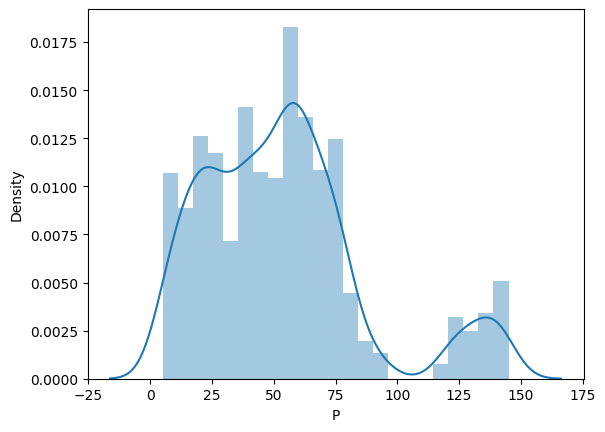

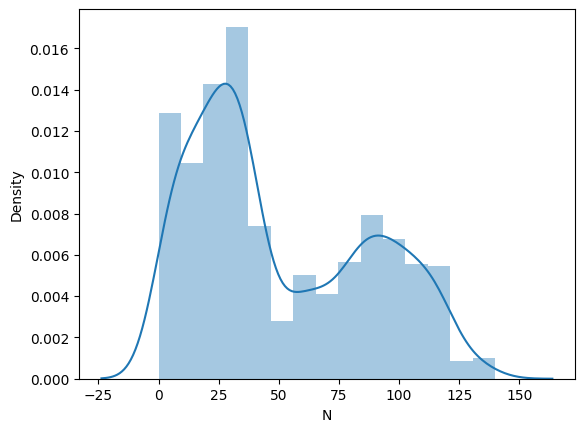

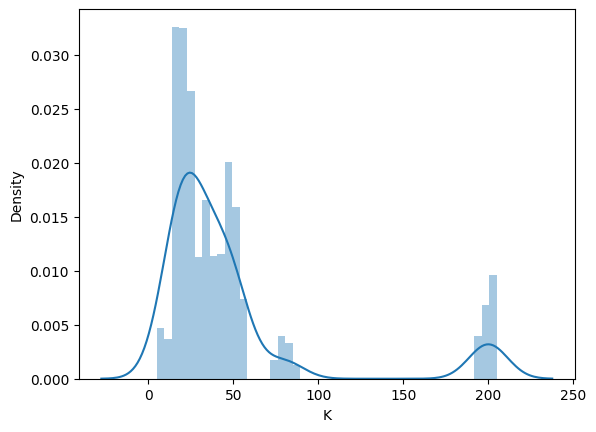

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
#crop_subset = crop[crop['label'] == 1]
#sns.distplot(crop_subset['P'])
plt.show()
sns.distplot(crop['N'])
plt.show()
sns.distplot(crop['K'])
plt.show()


In [ ]:
from ipywidgets import interact, Dropdown

@interact(crop_label=Dropdown(options=crop['label'].unique()))
def plot_distributions(crop_label):
    crop_subset = crop[crop['label'] == crop_label]
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    sns.distplot(crop_subset['P'])
    plt.title('Phosphorus Distribution')

    plt.subplot(1, 3, 2)
    sns.distplot(crop_subset['N'])
    plt.title('Nitrogen Distribution')

    plt.subplot(1, 3, 3)
    sns.distplot(crop_subset['K'])
    plt.title('Potassium Distribution')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='crop_label', options=('rice', 'maize', 'chickpea', 'kidneybeans', …

In [ ]:
# Lets understand which crops can be grown in Summer season; winter season; rainy season

print("Summer Crops -->")
print(crop[(crop['temperature'] > 30) & (crop['humidity'] > 50 )]['label'].unique())
print('*'*50)

print("Winter Crops -->")
print(crop[(crop['temperature'] < 20) & (crop['humidity'] > 30 )]['label'].unique())
print('*'*50)

print("Rainy Crops -->")
print(crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30 )]['label'].unique())
print('*'*50)

# Find the best algorithm

In [ ]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee':22
}

crop['label'] = crop['label'].map(crop_dict)

In [ ]:
# Assuming crop_dict contains the different unique labels in the crop DataFrame
unique_labels = crop['label'].unique()

# Create a dictionary to hold the individual DataFrames for each label
split_dfs = {}

# Loop through each unique label and create a corresponding DataFrame
for label in unique_labels:
    split_dfs[label] = crop[crop['label'] == label]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.DataFrame()
y_test = pd.DataFrame()
for label in unique_labels:
    x = split_dfs[label].drop('label', axis=1)
    y = split_dfs[label]['label']
    X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(x, y, test_size=0.2, random_state=42)
    X_train = pd.concat([X_train, X_train_tmp])
    X_test = pd.concat([X_test, X_test_tmp])
    y_train = pd.concat([y_train, y_train_tmp])
    y_test = pd.concat([y_test, y_test_tmp])

In [ ]:
X_test.shape

(440, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [ ]:
!pip install catboost

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier, VotingClassifier

models = {
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionTuning': LogisticRegression(C = 100, penalty = 'l2', solver = 'lbfgs', max_iter = 100), #{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 100}
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'SVCTuning': SVC(C = 100, gamma = 'scale', kernel = 'linear'), #{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LinearSVC': LinearSVC(),
    'MLPClassifier': MLPClassifier(),  # Neural Networks
    'MLPClassifierTuning': MLPClassifier(solver = 'sgd', max_iter = 500, learning_rate_init = 0.1, learning_rate = 'adaptive', hidden_layer_sizes = (100, 50), alpha = 0.01, activation = 'tanh'),  # {'solver': 'sgd', 'max_iter': 500, 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'tanh'}
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'StackingClassifier': StackingClassifier(estimators=[
        ('lr', LogisticRegression()), ('rf', RandomForestClassifier())]),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'LabelPropagation': LabelPropagation(),
    'LabelPropagationTuning': LabelPropagation(gamma = 0.1, kernel = 'knn', max_iter = 500, n_neighbors = 10),    #{'gamma': 0.1, 'kernel': 'knn', 'max_iter': 500, 'n_neighbors': 10}
    'LGBMClassifier': LGBMClassifier(num_leaves = 10, verbose = -100),  # LightGBM
    'CatBoostClassifier': CatBoostClassifier(),
    #'BaggingClassifier': BaggingClassifier(),
    #'ExtraTreeClassifier': ExtraTreeClassifier(),
    #'LabelSpreading': LabelSpreading(),
    # 'VotingClassifier': VotingClassifier(estimators=[
    #     ('svc', SVC()), ('knn', KNeighborsClassifier())]),
    #'AdaBoostClassifier': AdaBoostClassifier(),
    #'RidgeClassifier': RidgeClassifier(),
    #'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
}


In [ ]:
accuracy_scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accuracy_scores.append([name, score])
    print(f"{name} mode with accuracy: {score}")
accuracy_scores_df = pd.DataFrame(data = accuracy_scores, columns=['Name', 'Accuracy'])

LogisticRegression mode with accuracy: 0.9431818181818182
LogisticRegressionTuning mode with accuracy: 0.975
GaussianNB mode with accuracy: 0.9931818181818182
SVC mode with accuracy: 0.9840909090909091
SVCTuning mode with accuracy: 0.9886363636363636
KNeighborsClassifier mode with accuracy: 0.9863636363636363
DecisionTreeClassifier mode with accuracy: 0.9818181818181818
RandomForestClassifier mode with accuracy: 0.9954545454545455
GradientBoostingClassifier mode with accuracy: 0.990909090909091
LinearSVC mode with accuracy: 0.9477272727272728
MLPClassifier mode with accuracy: 0.9681818181818181
MLPClassifierTuning mode with accuracy: 0.9886363636363636
LinearDiscriminantAnalysis mode with accuracy: 0.9636363636363636
QuadraticDiscriminantAnalysis mode with accuracy: 0.9931818181818182
StackingClassifier mode with accuracy: 0.9954545454545455
HistGradientBoostingClassifier mode with accuracy: 0.9931818181818182
LabelPropagation mode with accuracy: 0.9204545454545454
LabelPropagationTuni

In [ ]:
accuracy_scores_df.sort_values(by='Accuracy', ascending = False).style.hide()

Name,Accuracy
CatBoostClassifier,0.995455
RandomForestClassifier,0.995455
StackingClassifier,0.995455
HistGradientBoostingClassifier,0.993182
GaussianNB,0.993182
QuadraticDiscriminantAnalysis,0.993182
GradientBoostingClassifier,0.990909
LGBMClassifier,0.990909
SVCTuning,0.988636
MLPClassifierTuning,0.988636


In [ ]:
# prompt: make a confusion matrix which checks the predicted values from the model and the original values, make this plot interacttive where i can switch beetween the models from a dropdown

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown


@interact(model=Dropdown(options=accuracy_scores_df.sort_values(by='Accuracy', ascending = False)['Name']))
def plot_confusion_matrix(model):
    selected_model = models[model]
    y_pred = selected_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model}")
    plt.show()
    print(f"Accuracy for {model}: {accuracy_score(y_test, y_pred)}")
    adjusted_crop_dict = {key: value - 1 for key, value in crop_dict.items()}
    print(adjusted_crop_dict)

interactive(children=(Dropdown(description='model', options=('CatBoostClassifier', 'RandomForestClassifier', '…


# Hyperparameter Tuning

LogisticRegression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Hyperparameter grid
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 300, 500, 1000]
}

# Grid Search with cross-validation
search = RandomizedSearchCV(model, param_dist, cv=5, scoring='accuracy', n_iter=50, random_state=42)
search.fit(X_train, y_train)

# Get the best parameters and accuracy score
print("Best Parameters:",search.best_params_)
print("Best Accuracy:", search.best_score_)


LabelPropagation

In [ ]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


model = LabelPropagation()     # LabelPropagation model

# Define parameter grid for fine-tuning
param_grid = {
    'kernel': ['knn', 'rbf'],    # Try different kernels
    'gamma': [0.1, 0.5, 1, 5, 10],  # Only applicable if kernel='rbf'
    'n_neighbors': [5, 10, 20, 22, 30],  # Only applicable if kernel='knn'
    'max_iter': [500, 1000, 2000]  # Maximum number of iterations
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_accuracy)


LinearSVC

In [ ]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

model = LinearSVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
    'penalty': ['l1', 'l2'],                     # L2 penalty (can use 'l1' if loss is squared_hinge)
    'loss': ['hinge', 'squared_hinge'],    # Loss function to try
    'max_iter': [500, 1000, 2000, 5000]         # Number of iterations for solver convergence
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_accuracy)



SVC

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

model = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_accuracy)

MLP

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

model = MLPClassifier()  # MLP model


# Define the parameter grid for fine-tuning
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100, 50)],  # Number of layers and neurons
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizer
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'max_iter': [200, 500, 1000]  # Maximum number of iterations
}

# Perform grid search with cross-validation
search = RandomizedSearchCV(model, param_dist, cv=5, scoring='accuracy', n_iter=25, random_state=42, n_jobs=-1)

# Fit the grid search model
search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = search.best_params_
best_accuracy = search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_accuracy)


# Gradio interface for crop recommendation

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9931818181818182

In [ ]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    mx_features = mx.transform(features)
    prediction = model.predict(mx_features).reshape(1,-1)
    return prediction[0]

In [ ]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [ ]:
# prompt: Make a gradio interface which uses the recommendation function, and the user can set the parameters with sliders

import gradio as gr

def recommendation_wrapper(N, P, K, temperature, humidity, ph, rainfall):
    prediction = recommendation(N, P, K, temperature, humidity, ph, rainfall)
    crop_labels = {v: k for k, v in crop_dict.items()}  # Reverse the mapping
    predicted_crop = crop_labels.get(prediction[0], "Unknown")
    return predicted_crop

iface = gr.Interface(
    fn=recommendation_wrapper,
    inputs=[
        gr.Slider(minimum=0, maximum=200, step=1, label="Nitrogen (N)"),
        gr.Slider(minimum=0, maximum=200, step=1, label="Phosphorus (P)"),
        gr.Slider(minimum=0, maximum=400, step=1, label="Potassium (K)"),
        gr.Slider(minimum=0, maximum=50, step=0.1, label="Temperature"),
        gr.Slider(minimum=0, maximum=100, step=0.1, label="Humidity"),
        gr.Slider(minimum=0, maximum=14, step=0.1, label="pH"),
        gr.Slider(minimum=0, maximum=300, step=0.1, label="Rainfall")
    ],
    outputs=gr.Textbox(label="Recommended Crop"),
    title="Crop Recommendation System",
    description="Enter the input parameters to get a recommended crop."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://783b11b089bdef824a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
